# Diabetes Prediction And Analysis

In [35]:
#Loading packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [36]:
# Reading the diabetes.csv file
#diab is a DatAFrame

diab=pd.read_csv("diabetes.csv")
diab.head()
type(diab)

pandas.core.frame.DataFrame

### Checking the Data

In [37]:
#checking for basic information and null status
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Basic EDA

In [38]:
diab.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
#sns.countplot(x='Outcome',data=diab)
#plt.show()

### Brief Analysis of Data

In [40]:
import seaborn as sns

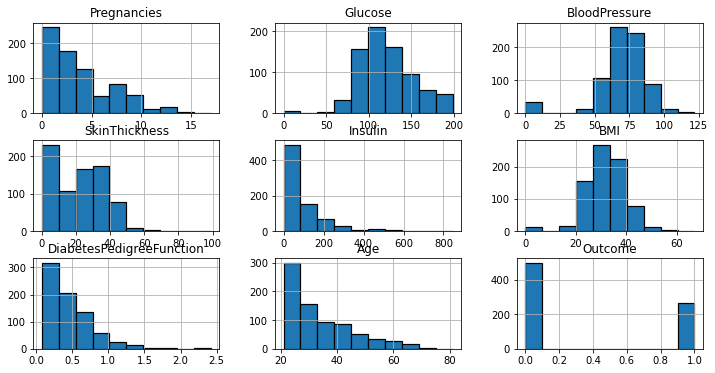

In [41]:
diab.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### Box Kind Plot

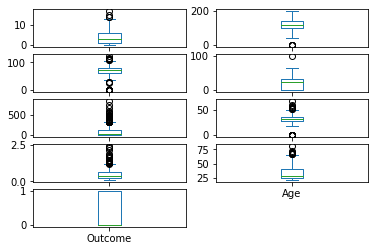

In [42]:
diab.plot(kind='box',subplots=True,layout=(5,2))
plt.show()

### Violin Plot Using Seaborn

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

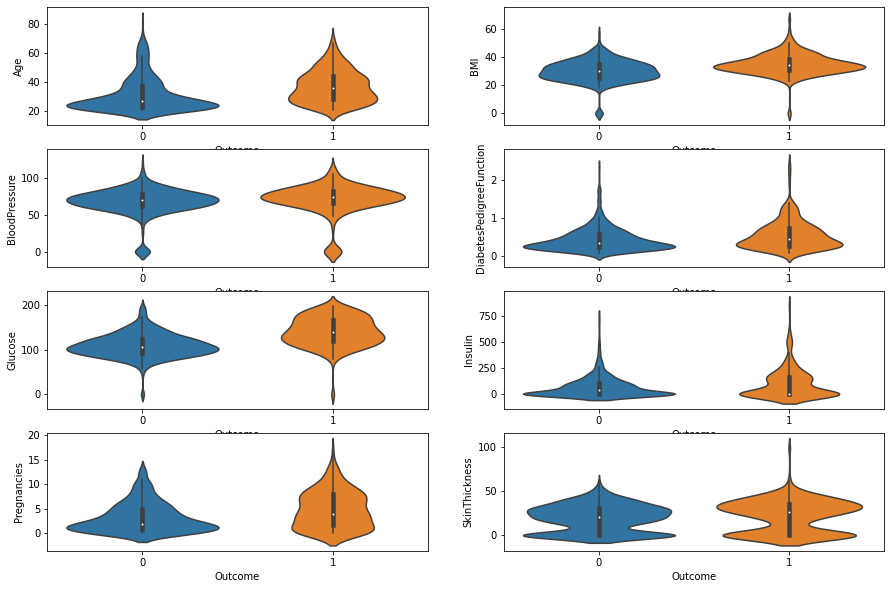

In [43]:
plt.figure(figsize=(15,10))
plt.subplot(4,2,1)
sns.violinplot(x='Outcome',y='Age',data=diab)
plt.subplot(4,2,2)
sns.violinplot(x='Outcome',y='BMI',data=diab)
plt.subplot(4,2,3)
sns.violinplot(x='Outcome',y='BloodPressure',data=diab)
plt.subplot(4,2,4)
sns.violinplot(x='Outcome',y='DiabetesPedigreeFunction',data=diab)
plt.subplot(4,2,5)
sns.violinplot(x='Outcome',y='Glucose',data=diab)
plt.subplot(4,2,6)
sns.violinplot(x='Outcome',y='Insulin',data=diab)
plt.subplot(4,2,7)
sns.violinplot(x='Outcome',y='Pregnancies',data=diab)
plt.subplot(4,2,8)
sns.violinplot(x='Outcome',y='SkinThickness',data=diab)

### PairPlots using Seaborn

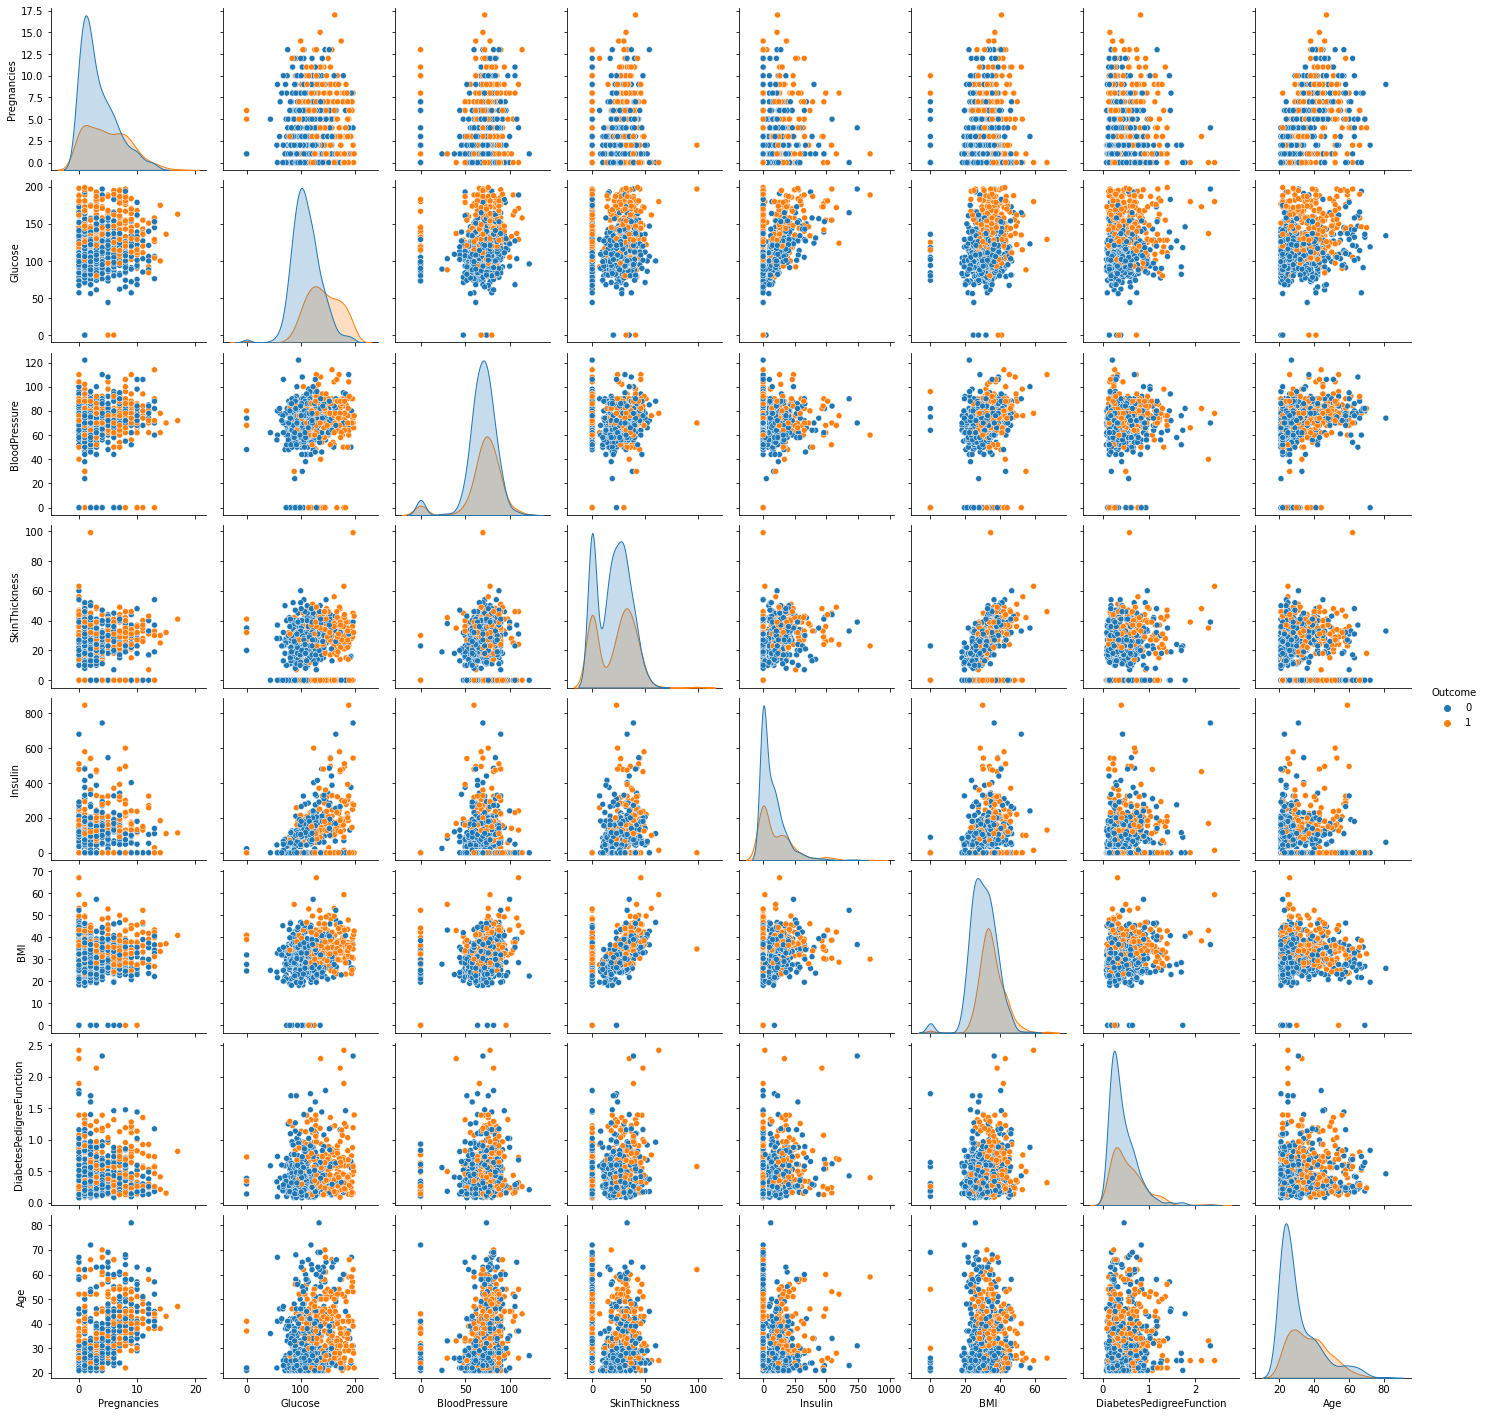

In [44]:
sns.pairplot(data=diab,hue='Outcome',diag_kind='kde')
plt.show()

# Predictive Analysis 

## Using scikit_learn 

In [45]:
#Importing Algorithms
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection 
from sklearn import metrics

In [46]:
import pandas as pd
# Reading the diabetes.csv fi# Reading the diabetes.csv file
#diab is a DatAFrame

diab=pd.read_csv("diabetes.csv")
diab.head()
diab.shape
#diab is a DatAFrame




(768, 9)

In [47]:
diab.head(5)



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
#Splitting the data in train and test part
#train = 75%
#test= 25%

train,test=model_selection.train_test_split(diab,test_size=0.25,random_state=12,stratify=diab['Outcome'])
train_X=train[train.columns[:8]]              # Feature Matrix
train_Y=train['Outcome']                      # Target Matrix
test_X=test[train.columns[:8]]
test_Y=test['Outcome']

train_X=train[train.columns[:8]]              # Feature Matrix
train_Y=train['Outcome']                      # Target Matrix
test_X=test[train.columns[:8]]
test_Y=test['Outcome']

In [49]:
train_Y

322    1
399    1
34     0
73     0
305    0
      ..
145    0
222    0
148    0
419    1
736    0
Name: Outcome, Length: 576, dtype: int64

In [50]:
train_X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
322,0,124,70,20,0,27.4,0.254,36
399,3,193,70,31,0,34.9,0.241,25
34,10,122,78,31,0,27.6,0.512,45
73,4,129,86,20,270,35.1,0.231,23
305,2,120,76,37,105,39.7,0.215,29


In [51]:
test_Y.head(5)

568    0
325    0
691    1
134    0
611    1
Name: Outcome, dtype: int64

# fdfgdfgfdg

In [52]:
test_Y.head(5)


568    0
325    0
691    1
134    0
611    1
Name: Outcome, dtype: int64

## Linear SVM 

In [53]:
#(Linear, Polynomial, RBF, and Sigmoid) 
model=svm.SVC(kernel='linear')

model.fit(train_X,train_Y)

prediction=model.predict(test_X)
print(prediction)
print('Accuracy of linear svm =',metrics.accuracy_score(prediction,test_Y))


[1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1]
Accuracy of linear svm = 0.796875


## RBF SVM

In [54]:
from sklearn.metrics import accuracy_score
model=svm.SVC(kernel='rbf')

model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('Accuracy of rbf svm =',accuracy_score(prediction,test_Y))

Accuracy of rbf svm = 0.7552083333333334


## LogisticRegression 

In [55]:
model=LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('Accuracy of LR =',metrics.accuracy_score(prediction,test_Y))

Accuracy of LR = 0.7864583333333334


C:\Users\Anita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## DecisionTreeClassifier

In [56]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('Accuracy of  tree algorithm =',metrics.accuracy_score(prediction,test_Y))

Accuracy of  tree algorithm = 0.7708333333333334


## KNeighborsClassifier

In [57]:
for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i,leaf_size=1 )
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy of K-Neighbour(i=',i,') =',metrics.accuracy_score(prediction,test_Y))

Accuracy of K-Neighbour(i= 1 ) = 0.6875
Accuracy of K-Neighbour(i= 2 ) = 0.7291666666666666
Accuracy of K-Neighbour(i= 3 ) = 0.6614583333333334
Accuracy of K-Neighbour(i= 4 ) = 0.6979166666666666
Accuracy of K-Neighbour(i= 5 ) = 0.703125
Accuracy of K-Neighbour(i= 6 ) = 0.7135416666666666
Accuracy of K-Neighbour(i= 7 ) = 0.7135416666666666
Accuracy of K-Neighbour(i= 8 ) = 0.734375
Accuracy of K-Neighbour(i= 9 ) = 0.7239583333333334
Accuracy of K-Neighbour(i= 10 ) = 0.734375


#####  KNeighborsClassifier(i=7) has the highest Accuracy =79.7%
##### Therefore we will use KNeighborsClassifier
#####                                           




### HeatMap

In [58]:
#sns.heatmap(diab[diab.columns[:8]].corr(),annot=True,cmap='RdYlGn')
#fig=plt.gcf()
#fig.set_size_inches(10,8)
#plt.show()

## Cross Validation

In [59]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score



In [60]:
kf=KFold(n_splits=5,random_state=20, shuffle=True)
cv_result = cross_val_score(model,diab[diab.columns[:4]],diab['Outcome'], cv = kf,scoring = "accuracy")
    #cv_result=cv_result
print(cv_result)
type(cv_result)
cv_result.mean()

[0.72727273 0.73376623 0.72077922 0.7124183  0.74509804]


0.7278669043374926

In [61]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
kf=KFold(n_splits=5,random_state=20, shuffle=True)

for i in models:
    model = i
    #diab[xtrain,ytrain]
    cv_result = cross_val_score(model,diab[diab.columns[:4]],diab['Outcome'], cv = kf,scoring = "accuracy")
    #cv_result=cv_result
   #print(cv_result)
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
    print(accuracy)
new_models_dataframe2=pd.DataFrame(xyz,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2

[array([0.75974026, 0.72727273, 0.72727273, 0.73856209, 0.71895425])]
[array([0.75974026, 0.72727273, 0.72727273, 0.73856209, 0.71895425]), array([0.72727273, 0.75324675, 0.72727273, 0.71895425, 0.77777778])]
[array([0.75974026, 0.72727273, 0.72727273, 0.73856209, 0.71895425]), array([0.72727273, 0.75324675, 0.72727273, 0.71895425, 0.77777778]), array([0.76623377, 0.72077922, 0.72727273, 0.74509804, 0.7254902 ])]
[array([0.75974026, 0.72727273, 0.72727273, 0.73856209, 0.71895425]), array([0.72727273, 0.75324675, 0.72727273, 0.71895425, 0.77777778]), array([0.76623377, 0.72077922, 0.72727273, 0.74509804, 0.7254902 ]), array([0.67532468, 0.68181818, 0.7012987 , 0.69934641, 0.7124183 ])]
[array([0.75974026, 0.72727273, 0.72727273, 0.73856209, 0.71895425]), array([0.72727273, 0.75324675, 0.72727273, 0.71895425, 0.77777778]), array([0.76623377, 0.72077922, 0.72727273, 0.74509804, 0.7254902 ]), array([0.67532468, 0.68181818, 0.7012987 , 0.69934641, 0.7124183 ]), array([0.62337662, 0.68831169

,CV Mean
Linear Svm,0.734360
Radial Svm,0.740905
Logistic Regression,0.736975
KNN,0.694041
Decision Tree,0.673211


# GUI 
## using Tkinter

In [62]:
#fun function is attached to 'Show Result' button
#It Will Show The Result in POSITIVE or NEGATIVE

def fun():
    lis1=[]
    a1=pregnancies.get()
    a2=glucose.get()
    a3=bp.get()
    a4=st.get()
    a5=insulin.get()
    a6=bmi.get()
    a7=dpf.get()
    a8=age.get()

    lis1.append(a1)
    lis1.append(a2)
    lis1.append(a3)
    lis1.append(a4)
    lis1.append(a5)
    lis1.append(a6)
    lis1.append(a7)
    lis1.append(a8)
    
    ind=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
    test_x1=pd.DataFrame(lis1,index=ind)
    
    
    model=KNeighborsClassifier(n_neighbors=7)
    model.fit(train_X,train_Y) 
    prediction=model.predict(test_x1.T) 
    
    if prediction==0:
        lab=Label(f1,text="RESULT= NEGATIVE",font = ('arial', 14, 'bold'),bd = 14, anchor = "w",bg='lawn green')
    else: lab=Label(f1,text="RESULT= POSITIVE",font = ('arial', 14, 'bold'),bd = 14, anchor = "w",bg='red')
    lab.grid(row=9,column=1)


    
#Reset Function will reset the entry widgets
#It is submenu in 'File' Menu
def reset():
    pregnancies.set("")
    glucose.set("")
    bp.set("")
    st.set("")
    insulin.set("")
    bmi.set("")
    dpf.set("")
    age.set("")
    lab=Label(f1,text="                                       ",font = ('arial', 14, 'bold'),bd = 14, anchor = "w")
    lab.grid(row=9,column=1)
    
    


In [63]:
#Graphs

#from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2TkAgg
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def hist():
    diab.hist(edgecolor='black', linewidth=1.2)
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    fig.suptitle("Histogram Plot")
    dataPlot = FigureCanvasTkAgg(fig, master=f2)
    dataPlot.get_tk_widget().grid(row=0,column=0)
    
def violin():
    plt.figure(figsize=(10,6))
    fig=plt.gcf()
    fig.suptitle("Violin Plot")
    plt.subplot(4,2,1)
    sns.violinplot(x='Outcome',y='Age',data=diab)
    plt.subplot(4,2,2)
    sns.violinplot(x='Outcome',y='BMI',data=diab)
    plt.subplot(4,2,3)
    sns.violinplot(x='Outcome',y='BloodPressure',data=diab)
    plt.subplot(4,2,4)
    sns.violinplot(x='Outcome',y='DiabetesPedigreeFunction',data=diab)
    plt.subplot(4,2,5)
    sns.violinplot(x='Outcome',y='Glucose',data=diab)
    plt.subplot(4,2,6)
    sns.violinplot(x='Outcome',y='Insulin',data=diab)
    plt.subplot(4,2,7)
    sns.violinplot(x='Outcome',y='Pregnancies',data=diab)
    plt.subplot(4,2,8)
    sns.violinplot(x='Outcome',y='SkinThickness',data=diab)
    dataPlot = FigureCanvasTkAgg(fig, master=f2)
    dataPlot.get_tk_widget().grid(row=0,column=0)
    
def Count():
    sns.countplot(x='Outcome',data=diab)
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    fig.suptitle("Count Plot")
    dataPlot = FigureCanvasTkAgg(fig, master=f2)
    dataPlot.get_tk_widget().grid(row=0,column=0)
    
def scatter(): 
    sns.pairplot(data=diab,hue='Outcome',diag_kind='kde')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    fig.suptitle("Scatter Graph")
    dataPlot = FigureCanvasTkAgg(fig, master=f2)
    dataPlot.get_tk_widget().grid(row=0,column=0)
    
def heat():
    sns.heatmap(diab[diab.columns[:8]].corr(),annot=True,cmap='RdYlGn')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    fig.suptitle("Heat Map")
    dataPlot = FigureCanvasTkAgg(fig, master=f2)
    dataPlot.get_tk_widget().grid(row=0,column=0)
    
    

### Run the following Code for 
# Tkinter GUI Window

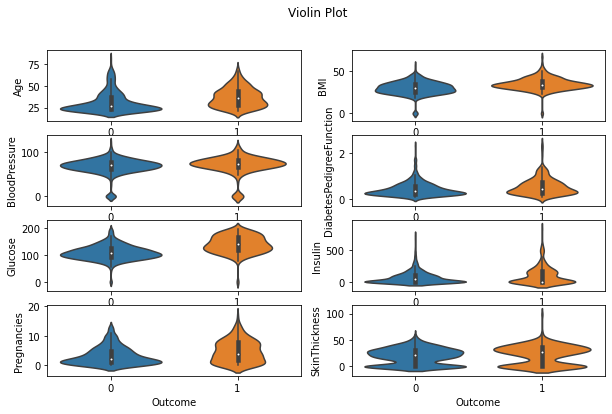

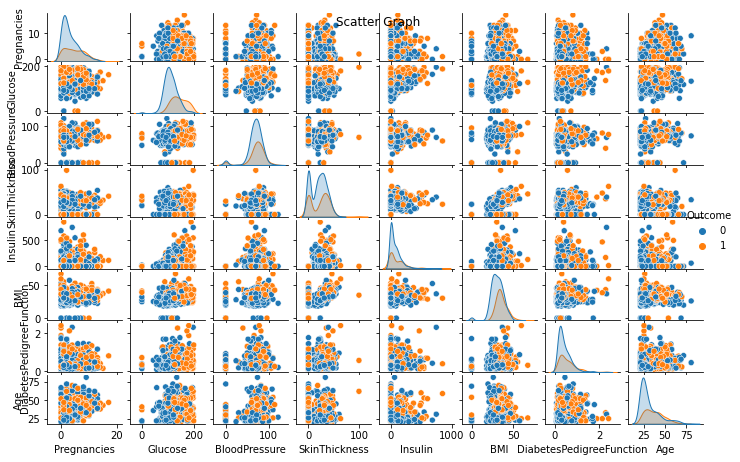

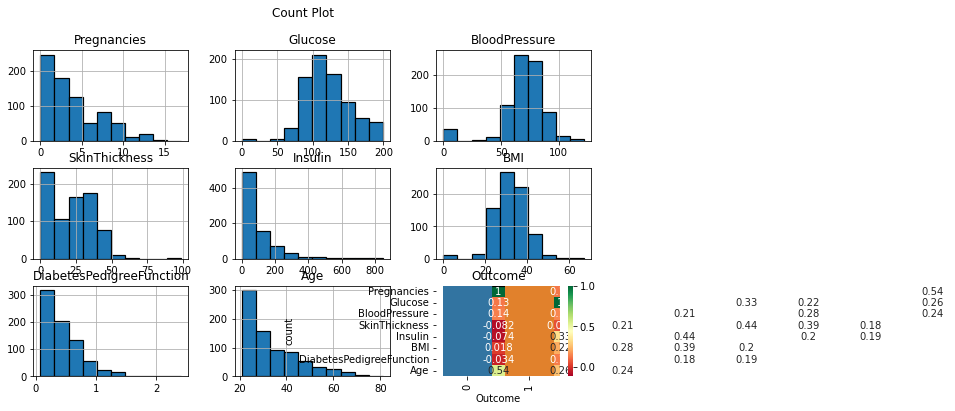

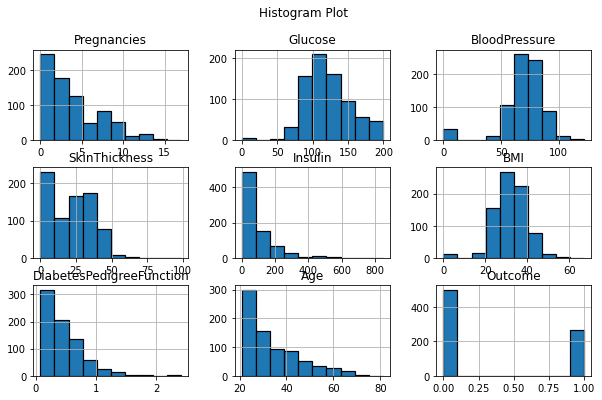

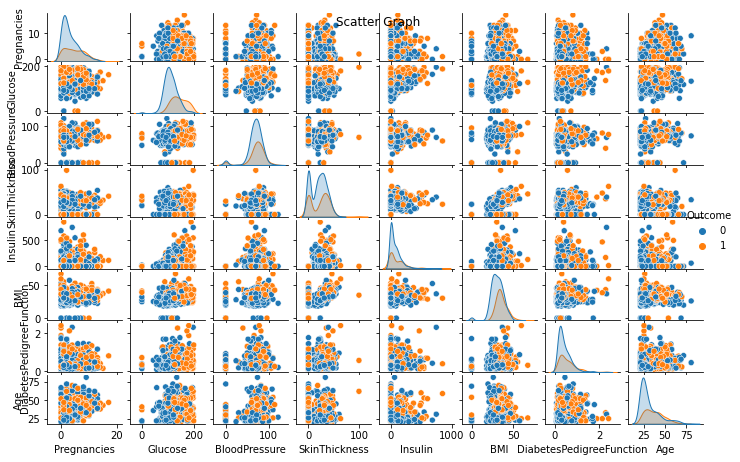

In [64]:
# import tkinter module
from tkinter import *

# import other necessery modules
import time
import datetime

root=Tk()
root.geometry("1400x700")
root.title('Diabetes Prediction')

#Top Frame for title and Time
tops = Frame(root, width = 1600, relief = SUNKEN)
tops.pack(side = TOP)
 
#Left Frame for label,Entries and Button    
f1 = Frame(root, width = 800, height = 700,relief = SUNKEN)
f1.pack(side = LEFT)

#Right Frame for Graphs
f2 = Frame(root, width = 800, height = 700,relief = SUNKEN)
f2.pack(side = RIGHT)


localtime = time.asctime(time.localtime(time.time()))  #for time

#Title label
labelinfo = Label(tops, font = ('helvetica', 33, 'bold'), text = "  Diabetes \n Analysis and Prediction",fg = "Black", bd = 10, anchor='w')             
labelinfo.grid(row = 0, column = 0)
#Time Label
labelinfo = Label(tops, font=('arial', 14, 'bold'),text = localtime, fg = "Steel Blue",bd = 10, anchor = 'w')               
labelinfo.grid(row = 1, column = 0)



#Creating the Menu
menu1=Menu(root)
root.config(menu=menu1)
subMenu1=Menu(menu1)

#File Menu
menu1.add_cascade(label="File",menu=subMenu1)       #main menu
#subMenu1.add_command(label="Reset",command=reset)        #submenus
subMenu1.add_command(label="Exit",command=root.destroy)

#graph Menu                              
graphMenu=Menu(menu1)                                               # main menu 2
menu1.add_cascade(label="Graphs",menu=graphMenu)                    #sub menus
graphMenu.add_command(label="Count_Plot",command=Count)
graphMenu.add_command(label="Histogram_Plot",command=hist)
graphMenu.add_command(label="Violin_Plot",command=violin)
graphMenu.add_command(label="Scatter_Plot",command=scatter)
graphMenu.add_command(label="HeatMap",command=heat)



#Labels
label0=Label(f1,font = ('arial', 13, 'bold'),text="Pregnancies",bd = 14, anchor = "w")
label0.grid(row=0,column=0,sticky=E)
label1=Label(f1,text="Glucose",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label1.grid(row=1,column=0,sticky=E)
label2=Label(f1,text="BloodPressure",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label2.grid(row=2,column=0,sticky=E)
label3=Label(f1,text="SkinThickness",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label3.grid(row=3,column=0,sticky=E)
label4=Label(f1,text="Insulin",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label4.grid(row=4,column=0,sticky=E)
label5=Label(f1,text="BMI",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label5.grid(row=5,column=0,sticky=E)
label6=Label(f1,text="DiabetesPedigreeFunction",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label6.grid(row=6,column=0,sticky=E)
label7=Label(f1,text="Age",font = ('arial', 13, 'bold'),bd = 14, anchor = "w")
label7.grid(row=7,column=0,sticky=E)

#Text Variables fro Entry
pregnancies = StringVar()
glucose = StringVar()
bp= StringVar()
st= StringVar()
insulin= StringVar()
bmi= StringVar()
dpf= StringVar()
age= StringVar()

#Entry Widget
entry0=Entry(f1,textvariable = pregnancies, font = ('arial', 12, 'bold'), bd = 8, insertwidth =4,bg = "peach puff", justify = 'right')
entry1=Entry(f1,textvariable = glucose, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "peach puff", justify = 'right')
entry2=Entry(f1,textvariable = bp, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "peach puff", justify = 'right')
entry3=Entry(f1,textvariable = st, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "peach puff", justify = 'right')
entry4=Entry(f1,textvariable = insulin, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "peach puff", justify = 'right')
entry5=Entry(f1,textvariable = bmi, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "peach puff", justify = 'right')
entry6=Entry(f1,textvariable = dpf, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "peach puff", justify = 'right')
entry7=Entry(f1,textvariable = age, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,bg = "peach puff", justify = 'right')

entry0.grid(row=0,column=1)
entry1.grid(row=1,column=1)
entry2.grid(row=2,column=1)
entry3.grid(row=3,column=1)
entry4.grid(row=4,column=1)
entry5.grid(row=5,column=1)
entry6.grid(row=6,column=1)
entry7.grid(row=7,column=1)

#Button 
button=Button(f1,text = "Show Result", command=fun, padx = 16, pady = 8, bd = 8, fg = "black",
font = ('arial', 14, 'bold'), width = 12, bg = "aquamarine")
button.grid(row=8,column=1)


root.mainloop()

In [65]:
a="http://google.com"

In [66]:
a


'http://google.com'

In [67]:
lst=[]

In [68]:
lst.

SyntaxError: invalid syntax (Temp/ipykernel_11692/3240820400.py, line 1)